In [1]:
# %load /Users/wayment/ipynb_defaults.py
%pylab inline
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')
import sys

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
# python CalculateModelFeatures.py */*pdb --ref_struct 2qkeE.pdb 5jytA.pdb -o output_feats.json.zip
df = pd.read_json('output_feats.json.zip')

In [5]:
df['pdb'].iloc[0]

'2QKE_full_shafer_reproduce_3b8b0/2QKE_full_shafer_reproduce_3b8b0_unrelaxed_rank_001_alphafold2_ptm_model_3_seed_025.pdb'

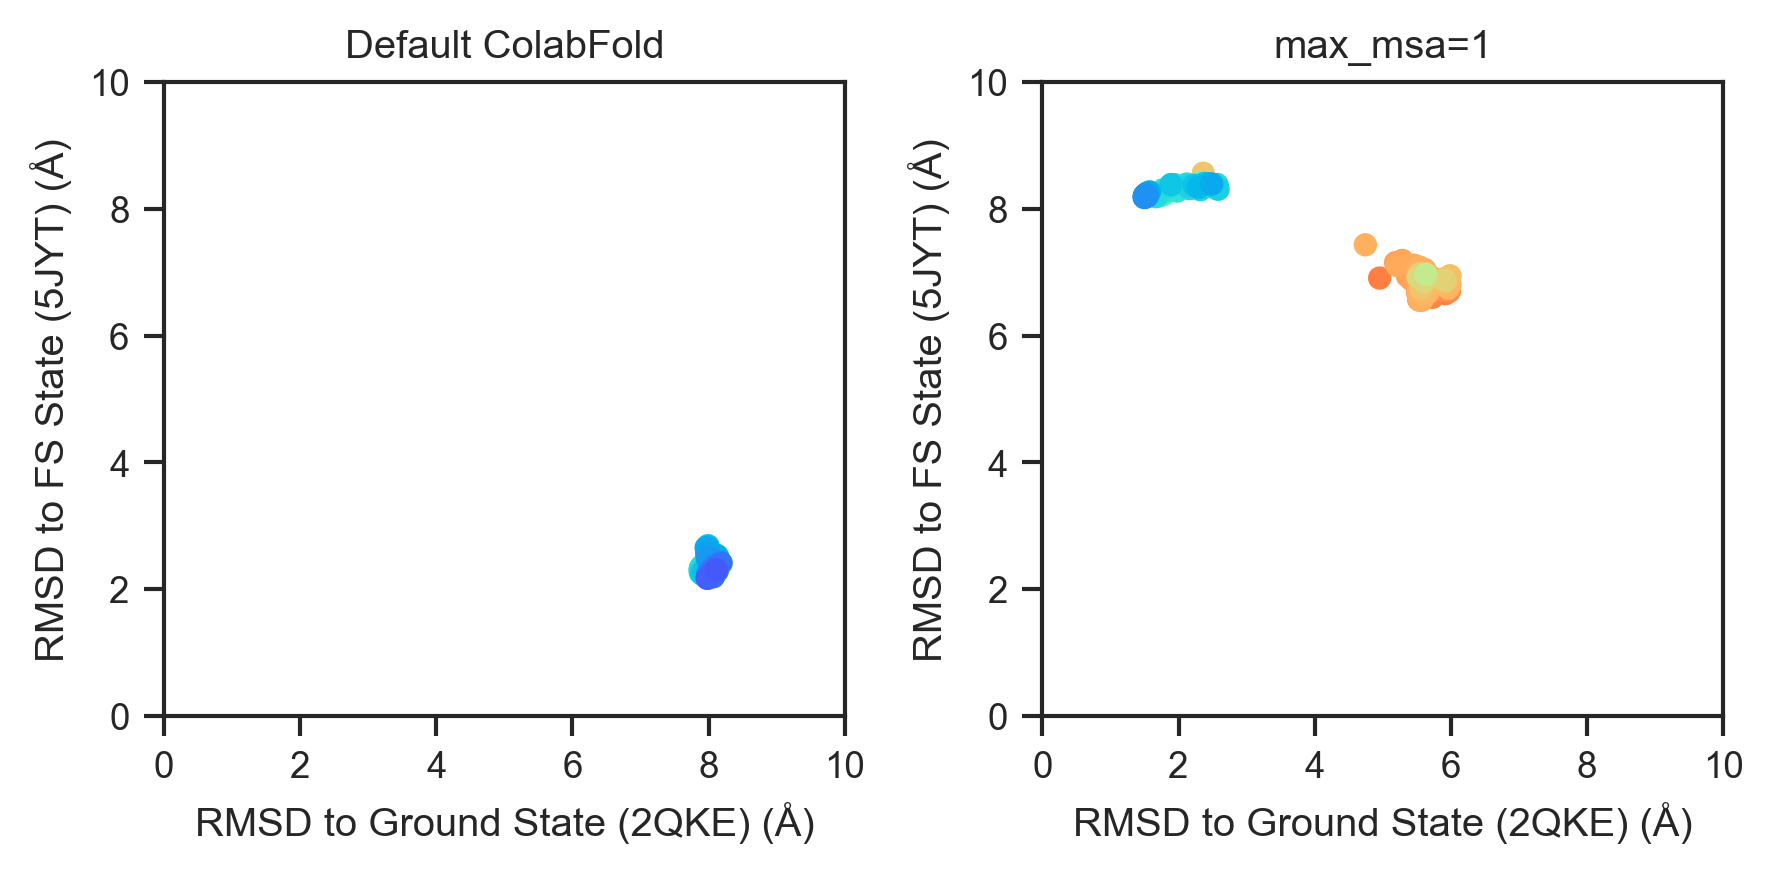

In [12]:
df['type'] = ['Default ColabFold']*165 + ['max_msa=1']*165

figure(figsize=(6,3))
for i, d in enumerate(['Default ColabFold','max_msa=1']):
    subplot(1,2,i+1)
    tmp = df.loc[df.type==d]
    tmp = tmp.sort_values('mean_pLDDT')
    scatter(tmp['rmsd_ref_2qkeE']*10,tmp['rmsd_ref_5jytA']*10, #x10 to coonvert to Å
            c=tmp['mean_pLDDT'],cmap='rainbow_r',vmin=50,vmax=90)
    title(d)
    xlim([0,10])
    ylim([0,10])
    xlabel('RMSD to Ground State (2QKE) (Å)')
    ylabel('RMSD to FS State (5JYT) (Å)')
    
tight_layout()
savefig('rebuttal_fig.pdf',bbox_inches='tight')

In [11]:
! open -a "Adobe Illustrator" rebuttal_fig.pdf